# In this section we will compare the DE gene lists obtained from different DE methods (e.g. Ballgown, EdgeR, DESeq2)
#### First, we can view the first few lines of DEG obtained from Ballgown, EdgeR, DESeq2 methods:

In [1]:
head -n 3 $RNA_HOME/de/ballgown/ref_only/DE_genes.txt
head -n 3 $RNA_HOME/de/htseq_counts/DE_genes.txt
head -n 3 $RNA_HOME/de/deseq2/DE_sig_genes_DESeq2.tsv

MAPK8IP2
BID
NCAPH2
Gene	Symbol	logFC	logCPM	PValue	FDR	UHR_Rep1	UHR_Rep2	UHR_Rep3	HBR_Rep1	HBR_Rep2	HBR_Rep3
ENSG00000008735	MAPK8IP2	-5.77246134796536	11.0015798667181	0	0	13	17	8	397	531	466
ENSG00000100095	SEZ6L	-5.41809969461722	10.9568127145503	0	0	15	13	19	393	499	452
ensemblID	baseMean	log2FoldChange	lfcSE	pvalue	padj	Symbol	UHR_Rep1	UHR_Rep2	UHR_Rep3	HBR_Rep1	HBR_Rep2	HBR_Rep3
ERCC-00130	14196.1300033614	2.05248919860385	0.0402012934106753	0	0	ERCC-00130	34882	22442	28573	4042	5337	4382
ERCC-00004	1858.91861461876	2.37680571281586	0.0648525155206742	5.75303722987661e-295	1.2915568581073e-292	ERCC-00004	4590	3332	3690	455	538	497


In [2]:
cd $RNA_HOME/de/

# Already extract gene symbols for ballgown and edgeR method in Module03_HTSeq-count_edgeR_DESeq2.ipynb
#cut -f 1 $RNA_HOME/de/ballgown/ref_only/DE_genes.txt | sort | uniq > ballgown_DE_gene_symbols.txt
#cut -f 2 $RNA_HOME/de/htseq_counts/DE_genes.txt | sort | uniq | grep -v Gene_Name > htseq_counts_edgeR_DE_gene_symbols.txt

cut -f 7 $RNA_HOME/de/deseq2/DE_sig_genes_DESeq2.tsv | sort | uniq | grep -v Symbol > DESeq2_DE_gene_symbols.txt

##### To get the two gene lists you could open the txt files in web brownser:
- http://YOUR_PUBLIC_IPv4_ADDRESS/rnaseq/de/ballgown_DE_gene_symbols.txt
- http://YOUR_PUBLIC_IPv4_ADDRESS/rnaseq/de/DESeq2_DE_gene_symbols.txt
- http://YOUR_PUBLIC_IPv4_ADDRESS/rnaseq/de/htseq_counts_edgeR_DE_gene_symbols.txt

Or, use cat to print out each list in your terminal and then copy/paste:

In [ ]:
cat ballgown_DE_gene_symbols.txt
cat htseq_counts_edgeR_DE_gene_symbols.txt
cat DESeq2_DE_gene_symbols.txt

#### Visualize overlap with a venn diagram. This can be done with simple web tools like:
- https://www.biovenn.nl/
- http://bioinfogp.cnb.csic.es/tools/venny/

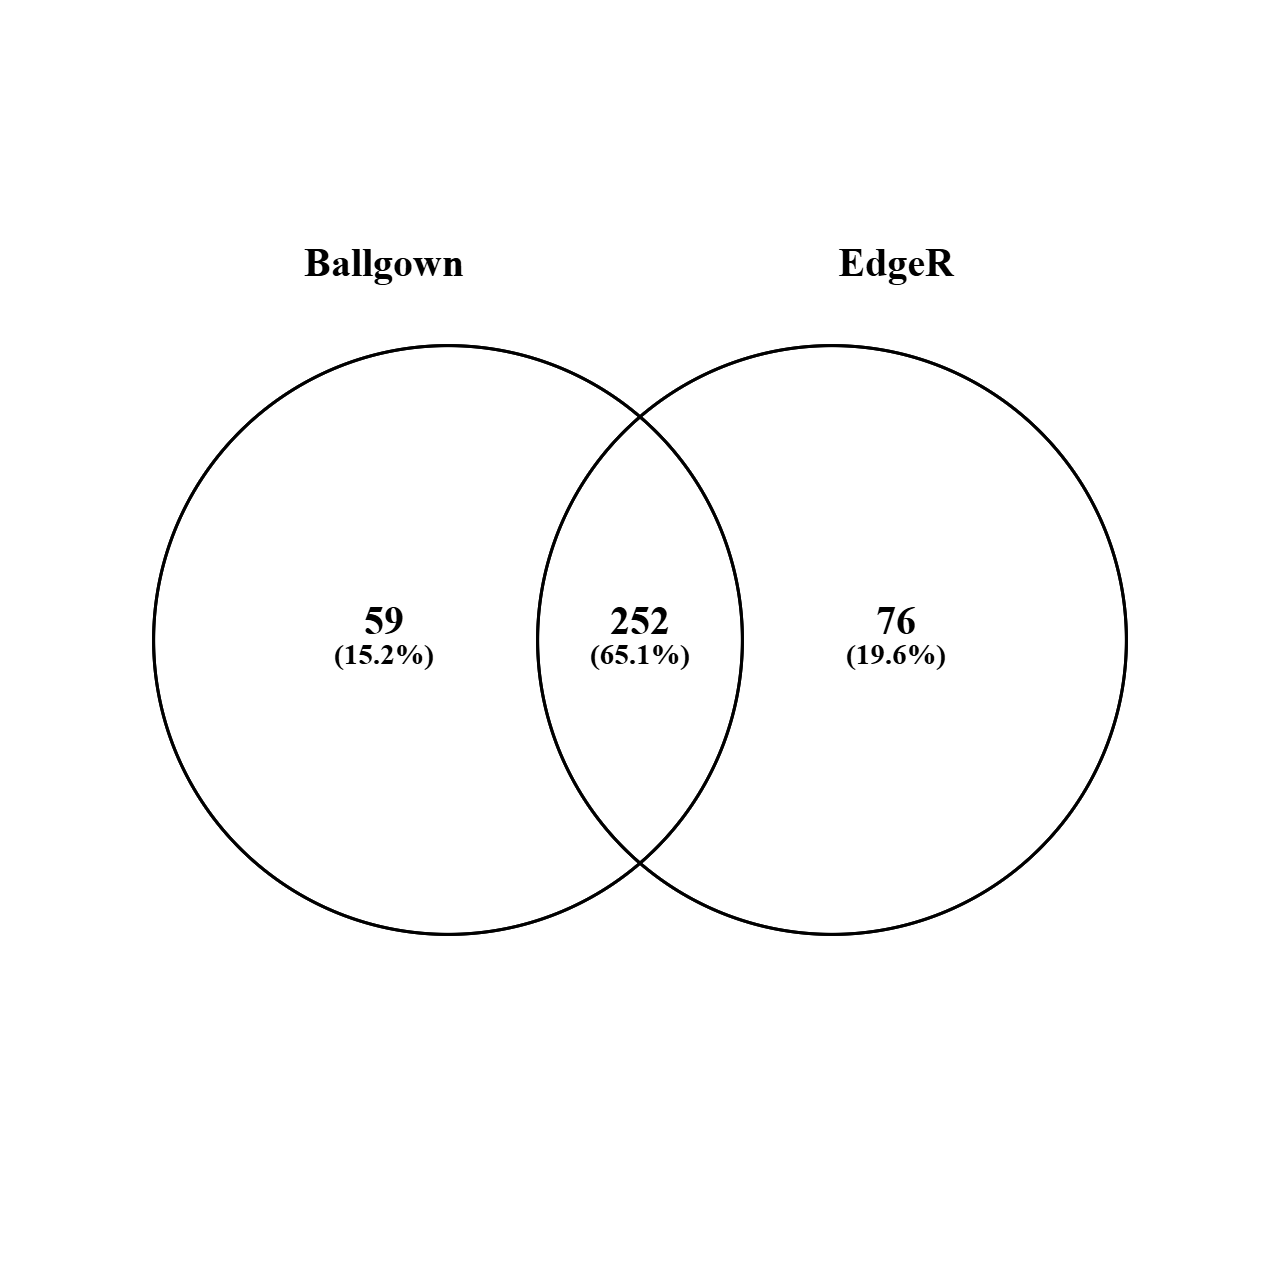

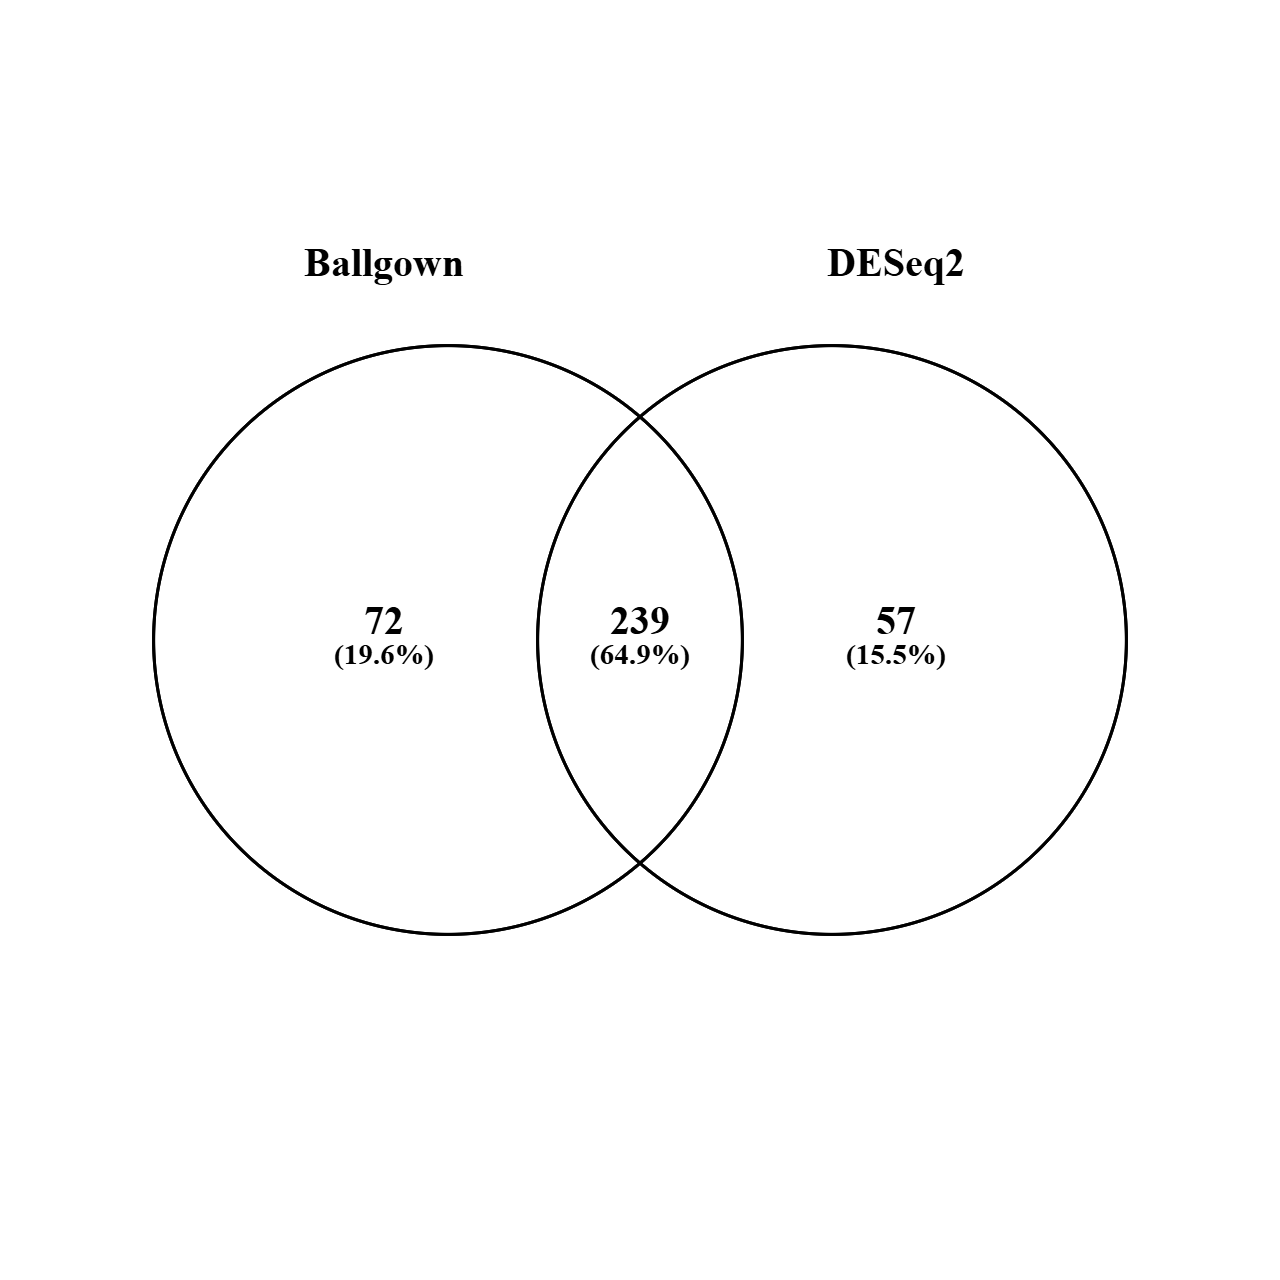

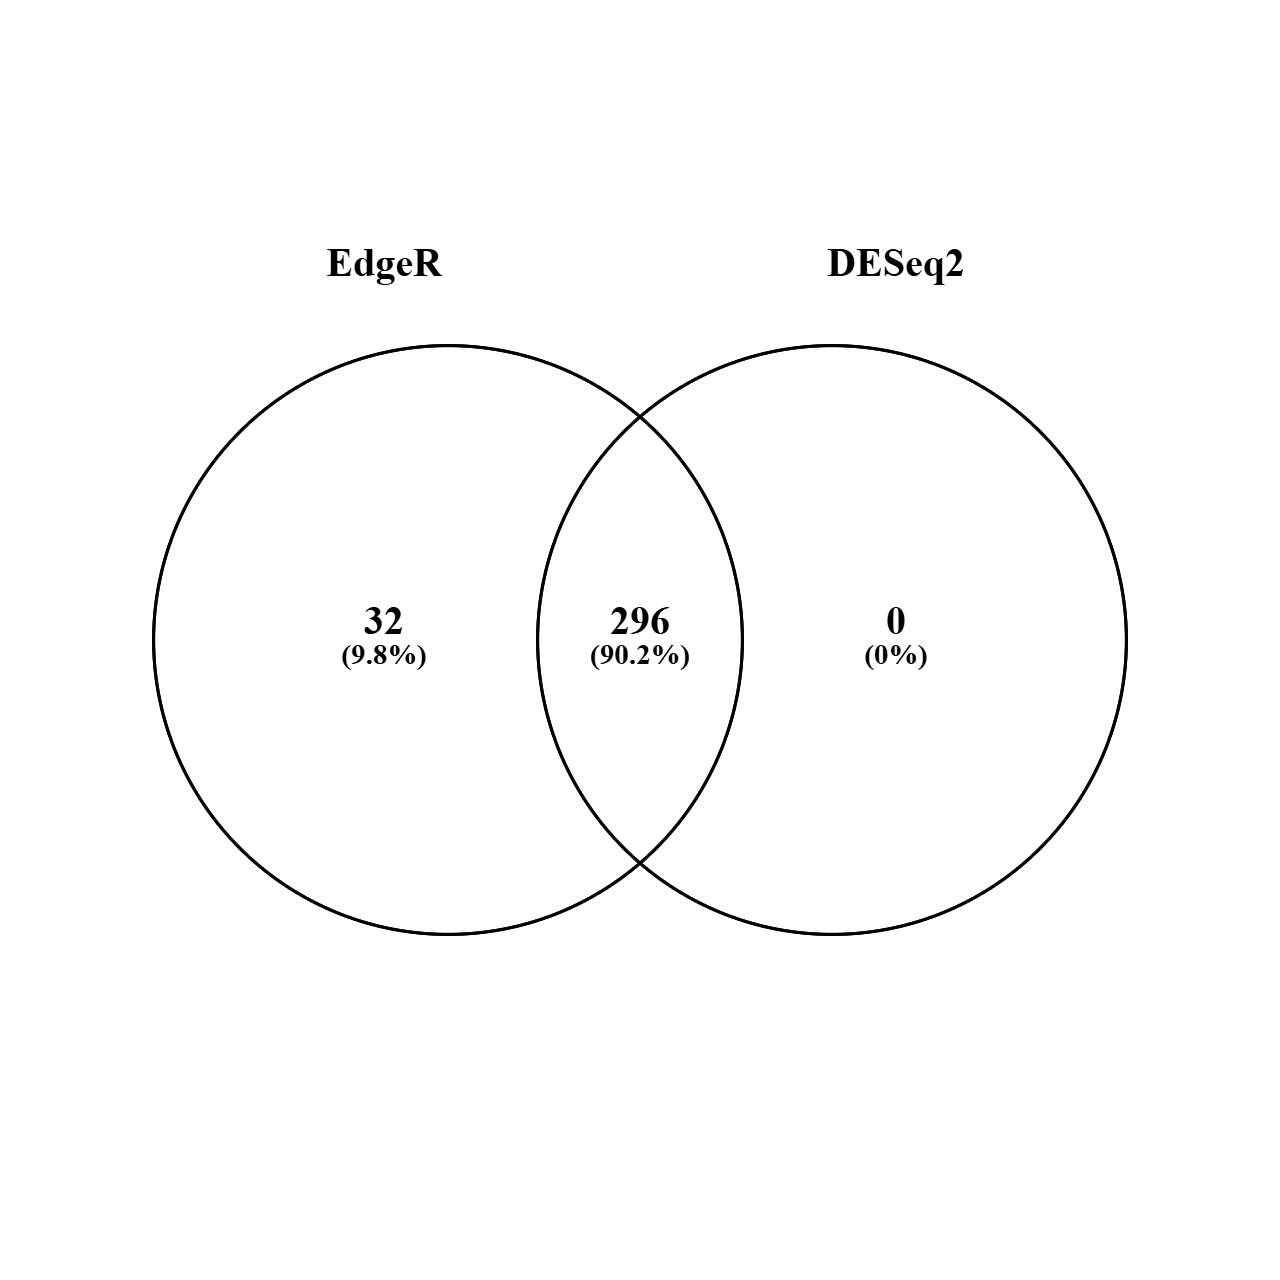

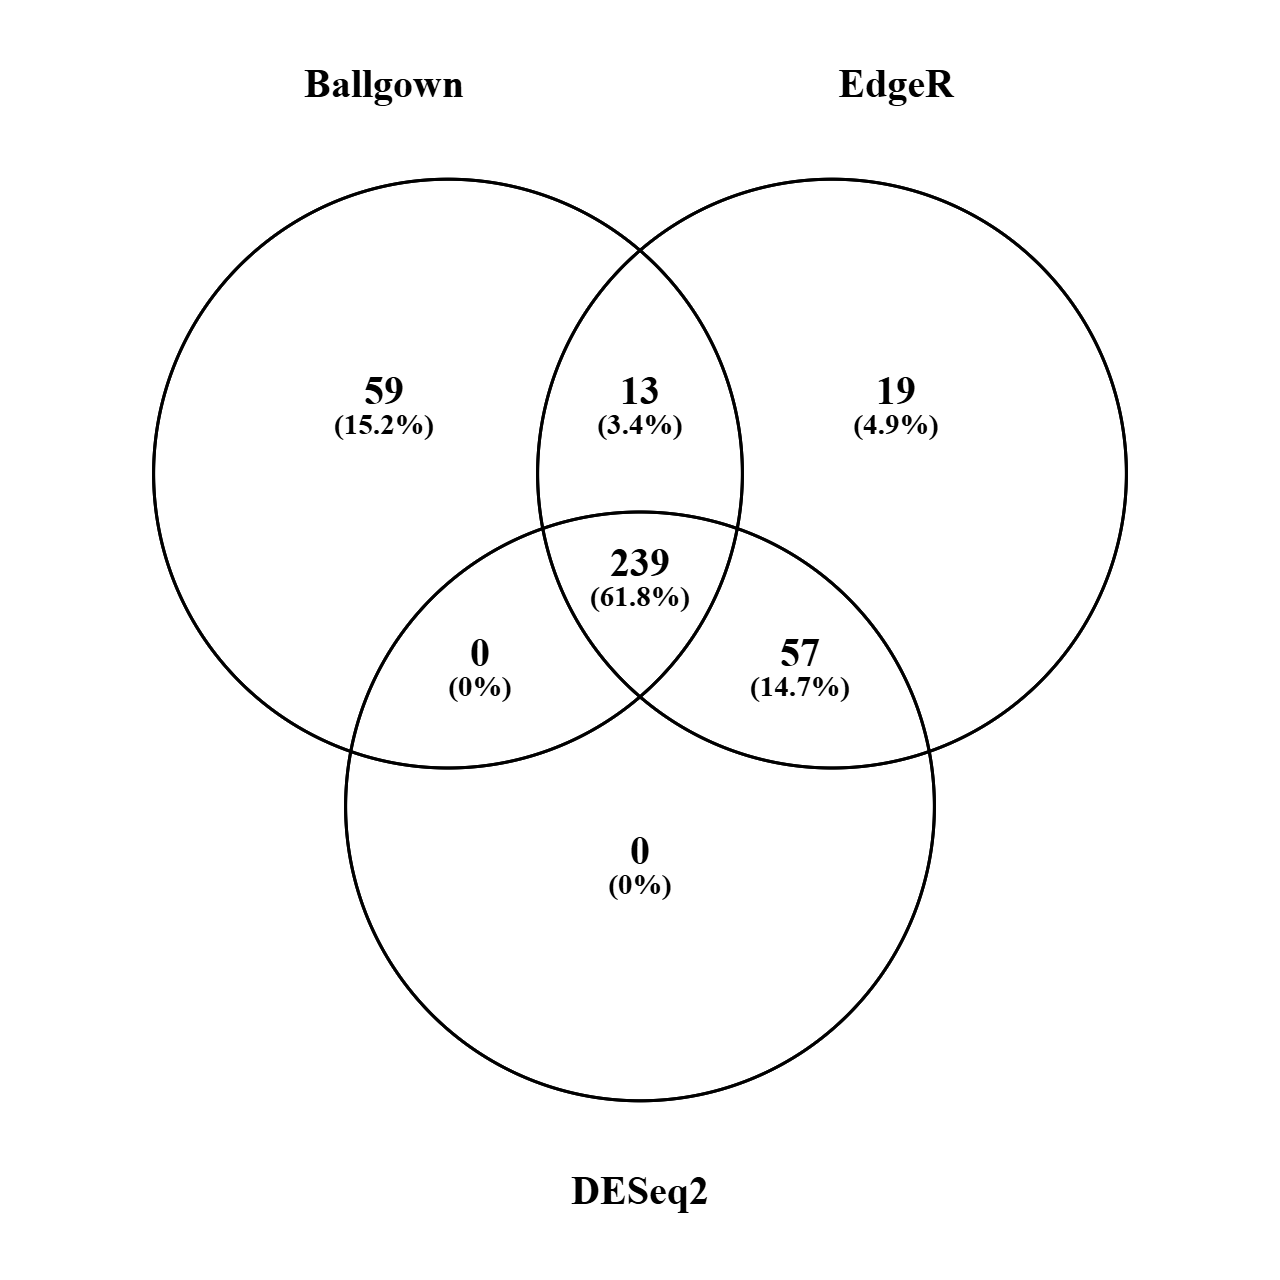


# Tool version

In [4]:
cd $RNA_HOME/student_tools/
stringtie --version
htseq-count --version

2.2.1
1.99.2


In [ ]:
R

packageVersion("ballgown")
packageVersion("edgeR")
packageVersion("DESeq2")

# Or, to see all loaded packages and their versions:
sessionInfo()

quit(save = "no")

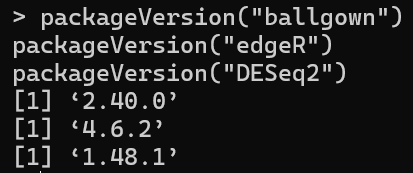

### ChatGPT explanation for the overlap significant differential gene expressions among 3 methods
#### 🔍 Why the overlap is lower between FPKM/TPM-style estimates (Ballgown) and count-based methods (DESeq2/EdgeR):
1. Input data structure:
- Ballgown uses FPKM/TPM-style estimates from StringTie, incorporating transcript-level abundances and exon structure.
- DESeq2/EdgeR use raw counts, which are modeled differently (e.g., via negative binomial distributions).

2. Statistical modeling:
- Ballgown uses a linear model on log-transformed expression values (like log2(FPKM+1)).
- DESeq2/EdgeR use models based on discrete count distributions, often more powerful at detecting differences, especially for low-count genes.

3. Gene models:
- Ballgown often operates at the transcript or exon level, whereas count-based methods usually aggregate at the gene level. (The course don't use this option: StringTie may reconstruct novel transcripts not in your gene annotation, which DESeq2/EdgeR ignore unless you explicitly handle them.)

4. Normalization methods:
- Ballgown’s FPKM/TPM-like values normalize for gene length and sequencing depth.
- DESeq2/EdgeR use scaling factor-based normalization (like TMM or median of ratios), which doesn’t account for gene length.

#### ✅ Why DESeq2 and EdgeR agree more (90.2% in your case):
- Both operate on HTSeq-count raw counts.
- Both use similar statistical frameworks (negative binomial models).
- Differences mainly come from slightly different normalization and dispersion estimation techniques.

#### ⚖️ So is this mind-blowing? Or expected?

It's both! It's a powerful reminder that: The choice of quantification tool (StringTie vs HTSeq) and the choice of statistical model (Ballgown vs EdgeR/DESeq2) can lead to biologically meaningful differences in DE results.

#### 🔧 What can you do with this insight?
- Report the overlap and method-specific results, just like you're doing.
- Investigate why some genes are only detected by one method — maybe they are low expression, have multiple isoforms, or depend on annotation complexity.
- For publication, consider showing Venn diagrams, concordance plots, and GO/pathway enrichment of overlapping vs unique sets.